# YouTube Spam Classification
This project aims to classify YouTube comments as spam or not spam using various machine learning algorithms.


## Table of Contents
1. [Data Loading](#data-loading)
2. [Data Exploration](#data-exploration)
3. [Data Preprocessing](#data-preprocessing)
4. [Data Visualization](#data-visualization)
5. [Model Training](#model-training)
6. [Model Evaluation](#model-evaluation)
7. [Conclusion](#conclusion)






## Data Loading

In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [213]:
# List of dataset file names
file_list = [
    'Youtube01-Psy.csv',
    'Youtube02-KatyPerry.csv',
    'Youtube03-LMFAO.csv',
    'Youtube04-Eminem.csv',
    'Youtube05-Shakira.csv'
]

df = pd.concat([pd.read_csv(file, encoding='latin-1') for file in file_list], ignore_index=True)


## Data Exploration

In [214]:
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^...,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .ï»¿,1


In [215]:
df.shape

(1956, 5)

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1956 entries, 0 to 1955
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  1956 non-null   object
 1   AUTHOR      1956 non-null   object
 2   DATE        1711 non-null   object
 3   CONTENT     1956 non-null   object
 4   CLASS       1956 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 76.5+ KB


In [217]:
df.isnull().sum()

,0
COMMENT_ID,0
AUTHOR,0
DATE,245
CONTENT,0
CLASS,0


In [218]:
df.duplicated().sum()

3

In [219]:
df[df['DATE'].isnull()]

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
1138,z12rwfnyyrbsefonb232i5ehdxzkjzjs2,Lisa Wellas,NaN,+447935454150 lovely girl talk to me xxxï»¿,1
1140,z13vsfqirtavjvu0t22ezrgzyorwxhpf3,Ajkal Khan,NaN,"my sister just received over 6,500 new <a rel=...",1
1142,z13xjfr42z3uxdz2223gx5rrzs3dt5hna,Jihad Naser,NaN,Hello I&#39;am from Palastineï»¿,1
1144,z12zgrw5furdsn0sc233hfwavnznyhicq,kyeman13,NaN,Go check out my rapping video called Four Whee...,1
1146,z12gxdortqzwhhqas04cfjrwituzghb5tvk0k,Muhammad Asim Mansha,NaN,Aslamu Lykum... From Pakistanï»¿,1
...,...,...,...,...,...
1578,LneaDw26bFv4NFg1m91sL1Aq1p-2N06VweQT4vOwTqc,Ando Nesia - | MC | Music Producer,NaN,DO YOU KNOW HOW SEAN KINGSTON GOT FAMOUS WHY D...,1
1580,LneaDw26bFsVQRSG0ecctIfRIn4Od1tJqvnhDwCNqbI,the34104,NaN,check out eminem latest track survival if u didnt,1
1581,LneaDw26bFu3RCmyrWyP9S6wh1h9dBv3X95g1HzKAb4,Dany PK,NaN,SUBSCRIBE TO MY CHANNEL X PLEASE!. SPARE,1
1582,LneaDw26bFsD65dtIvAEObWYIYnFTqQDKBek_Ypz3J8,SmexyFriedChicken,NaN,Check out my videos guy! :) Hope you guys had ...,1


In [220]:
df['CONTENT'].duplicated()

,CONTENT
0,False
1,False
2,False
3,False
4,False
...,...
1951,False
1952,False
1953,True
1954,False


In [221]:
df[df['CONTENT'].duplicated()]

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
126,z12kuncrps35wp1l0220s3t4ym32dtpin04,Aleksaivan Neidert,2014-11-05T15:35:49,PSY - GANGNAM STYLE (ê°ë¨ì¤íì¼) M/V: htt...,0
561,z12yfvzzpt2tizxvb22yj334vzmrh13gc04,Natalya Korshunova,2014-10-14T03:29:19,Katy Perry - Roar (Official): http://youtu.be/...,0
640,z13ufbpg5smtedf4v04ci5gqvqemyb2jsp00k,OFFICIAL LEXIS,2014-11-04T20:24:58,Hi everyone! Do you like music? Then why not c...,1
656,z12esjnx1qn4vhywy04cfvpaunnxtvhbpnw0k,dinda zivic,2014-11-07T09:19:50,Katy Perry - Roar (Official): http://youtu.be/...,0
658,z13ocdbaxwqdvjnwx04ccz1pnvqtezdriqc0k,UroÅ¡ Slemenjak,2014-11-07T12:16:21,"People, here is a new network like FB...you re...",1
...,...,...,...,...,...
1934,_2viQ_Qnc6-3Nk200KmVtS-kiCS_1CjKJsMIbXakyfI,hsn moghrbi,2013-07-17T21:14:40.168000,wow,0
1944,_2viQ_Qnc6-jk58CPwBnqfbM6oByJH5oPvCtKecLQyo,Shadrach Grentz,2013-07-14T03:11:20.243000,Hey Music Fans I really appreciate all of you ...,1
1946,_2viQ_Qnc69MEEHHJxZ427KX8MlljJPnUC2YBbvbWwY,ThirdDegr3e,2013-07-13T20:48:06.033000,**CHECK OUT MY NEW MIXTAPE**** **CHECK OUT MY ...,1
1947,_2viQ_Qnc6_RKHVetk9kLzx8ZC62_J7y73FWFSBTe8Q,ThirdDegr3e,2013-07-13T20:47:40.793000,**CHECK OUT MY NEW MIXTAPE**** **CHECK OUT MY ...,1


## Data Preprocessing

### Dropping Irrelevant Columns

I decided to remove a few columns from the dataset to focus on what really matters for our spam classification task.

1. **`DATE` Column**: The date when a comment was made doesn’t help us figure out if it’s spam or not, so I dropped it.

2. **`AUTHOR` Column**: While knowing who posted a comment could give us some insights, it’s not directly related to the classification. Since we’re focusing on the content, I decided to remove it as well.

3. **`COMMENT_ID` Column**: The unique ID for each comment isn’t useful for our analysis. It doesn’t provide any information about whether the comment is spam, so I took it out too.

Now, we’re left with just the `CONTENT` and `CLASS` columns, which are the most relevant for our project.



In [222]:
df.drop(['DATE', 'AUTHOR', 'COMMENT_ID'], axis=1, inplace=True)

In [223]:
df.isnull().sum()

,0
CONTENT,0
CLASS,0


In [224]:
df.drop_duplicates(subset='CONTENT', inplace=True, keep='first')

In [225]:
df.duplicated().sum()

0

## Data Visualization

In [226]:
class_counts= df['CLASS'].value_counts()
class_counts

,count
CLASS,
0,919
1,841


### Class Distribution

We have the following counts for our classes:

- **Ham (Class 0)**: 919 comments
- **Spam (Class 1)**: 841 comments

The dataset is fairly balanced, with a few more ham comments than spam. This balance is good for our spam classification task, as it helps the model learn from both types of comments effectively.


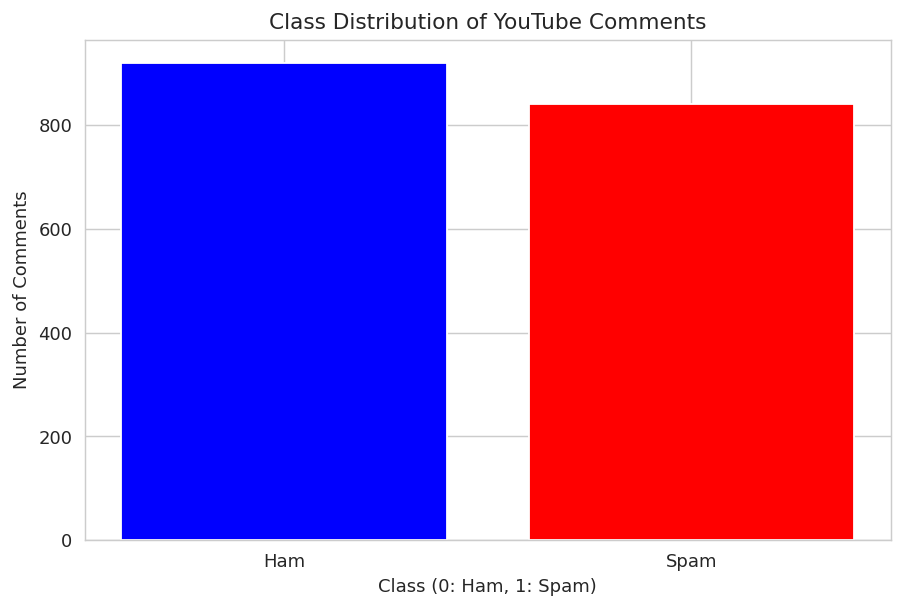

In [227]:
sns.set_style('whitegrid')
colors = ['blue', 'red']
plt.figure(figsize=(8, 5),dpi=130)
plt.bar(class_counts.index, class_counts.values, color=colors)
plt.title('Class Distribution of YouTube Comments')
plt.xlabel('Class (0: Ham, 1: Spam)')
plt.ylabel('Number of Comments')
plt.xticks(ticks=[0, 1], labels=['Ham', 'Spam'])
plt.show()

## Model Training

In this section, we will train multiple machine learning models to classify YouTube comments as spam or not spam. We will be using three algorithms: Naive Bayes, Support Vector Machine (SVM), Decision Tree and Logistic Regression

We will follow these steps:
1. Split the dataset into training and testing sets.
2. Vectorize the text data.
3. Train each model on the training set.

In [228]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


In [229]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(df['CONTENT'], df['CLASS'], test_size=0.2, random_state=42)

In [230]:
# Vectorization
vectorizer = CountVectorizer()
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [233]:
len(X_train_count.toarray()[1])

4050

In [234]:
len(vectorizer.get_feature_names_out())

4050

In [235]:
print(vectorizer.get_feature_names_out()[1:100])
print(X_train_count.toarray()[1][1:100])

['000' '002' '018' '02' '034' '04' '047000' '053012' '0687119038' '08'
 '09' '0d878a889cï'
 '0dbhjzdw0lbsjbi40gxm0d0p5krhv8xinqli53__wqbahs8zx4mjhw5vwrkpxfoeks' '10'
 '100' '1000' '10000000' '1000000000' '100000415527985' '100005244783212'
 '100007085325116ï' '10001' '100877300245414' '100ï'
 '101721377578919894134' '1030' '10626835' '106865403ï' '1073741825'
 '1073741828' '1073741830' '1073741943' '108k' '109' '10b35481' '11'
 '1111111111111111111ï' '1111ï' '111719098841907' '111982027348137311818'
 '112720997191206369631' '11cpwb' '11th' '12' '123ï' '124' '126' '127'
 '128gb' '12year' '13' '13017194ï' '131275322914' '1337' '134470083389909'
 '14' '1408122684' '1415297812' '1442646731' '1461302180794905ï'
 '1495323920744243' '1496241863981208' '1496273723978022'
 '1498561870415874' '14gkvdo' '15' '16' '161620527267482ï' '16gb' '17'
 '171183229277' '1727483389' '17yr' '18' '19' '19255' '1990' '19924' '1b'
 '1billiom' '1billion' '1bsefqe' '1fhenqx1twqm153v2ptayiejnealahzvemï'
 '1firo' '

In [236]:
# Train Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_count, y_train)

MultinomialNB()

In [237]:
# Train Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_count, y_train)

DecisionTreeClassifier()

In [238]:
# Train SVM
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train_count, y_train)

SVC()

In [239]:
# Train Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train_count, y_train)

LogisticRegression()

## Model Evaluation

In this section, we will evaluate the performance of the trained models using the test set. We will calculate accuracy, precision, recall, and F1-score for each model. These metrics will help us understand how well each algorithm performs in classifying YouTube comments.

We will assess the following models:
1. Naive Bayes
2. Support Vector Machine (SVM)
3. Decision Tree
4. Logistic Regression

For each model, we will provide the accuracy score and a detailed classification report that includes precision, recall, and F1-score.



In [257]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [245]:
predictions_dt = dt_model.predict(X_test_count)  # Decision Tree
predictions_nb = nb_model.predict(X_test_count)  # Naive Bayes
predictions_svm = svm_model.predict(X_test_count) # SVM
predictions_logreg = logreg_model.predict(X_test_count)  # Logistic Regression

In [253]:
def evaluate_model(model_name, predictions, y_test):
    print(f"{model_name} Performance:")
    print(classification_report(y_test, predictions))
    print(f'Accuracy: {accuracy_score(y_test, predictions)}\n')

# Evaluate models
evaluate_model("Decision Tree", predictions_dt, y_test)
evaluate_model("Naive Bayes", predictions_nb, y_test)
evaluate_model("Support Vector Machine", predictions_svm, y_test)
evaluate_model("Logistic Regression", predictions_logreg, y_test)


Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       191
           1       0.93      0.92      0.92       161

    accuracy                           0.93       352
   macro avg       0.93      0.93      0.93       352
weighted avg       0.93      0.93      0.93       352

Accuracy: 0.9289772727272727

Naive Bayes Performance:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       191
           1       0.89      0.96      0.92       161

    accuracy                           0.93       352
   macro avg       0.93      0.93      0.93       352
weighted avg       0.93      0.93      0.93       352

Accuracy: 0.9261363636363636

Support Vector Machine Performance:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       191
           1       0.95      0.90      0.93       161

    accuracy                      

All models performed well, achieving over 90% accuracy.

- **Decision Tree** achieved an accuracy of **92.9%**.
- **Naive Bayes** performed slightly lower with an accuracy of **92.6%**.
- **Support Vector Machine (SVM)** demonstrated a better performance with an accuracy of **93.5%**.
- **Logistic Regression** outperformed all others, attaining the highest accuracy at **94.6%**.


**Now, let's test our models on some random phrases to see which one predicts best.**

In [255]:

test_phrases = ['hello world', 'Great offer', 'hurry up', 'free', 'click', 'touch', 'spam', 'text', 'soon']

test_vectorized = vectorizer.transform(test_phrases)

test_nb = nb_model.predict(test_vectorized)
test_svm = svm_model.predict(test_vectorized)
test_dt = dt_model.predict(test_vectorized)
test_logreg = logreg_model.predict(test_vectorized)

comparison_df = pd.DataFrame({
    'Phrase': test_phrases,
    'Naive Bayes Prediction': test_nb,
    'SVM Prediction': test_svm,
    'Decision Tree Prediction': test_dt,
    'Logistic Regression Prediction': test_logreg
})

comparison_df



,Phrase,Naive Bayes Prediction,SVM Prediction,Decision Tree Prediction,Logistic Regression Prediction
0,hello world,1,0,1,0
1,Great offer,0,0,0,0
2,hurry up,1,0,0,0
3,free,1,0,0,0
4,click,1,0,0,0
5,touch,0,0,0,0
6,spam,1,0,0,0
7,text,1,0,0,0
8,soon,1,0,0,0


It can be seen that Naive Bayes is predicting well on the random phrases. Let’s visualize its confusion matrix for the YouTube spam predictions.

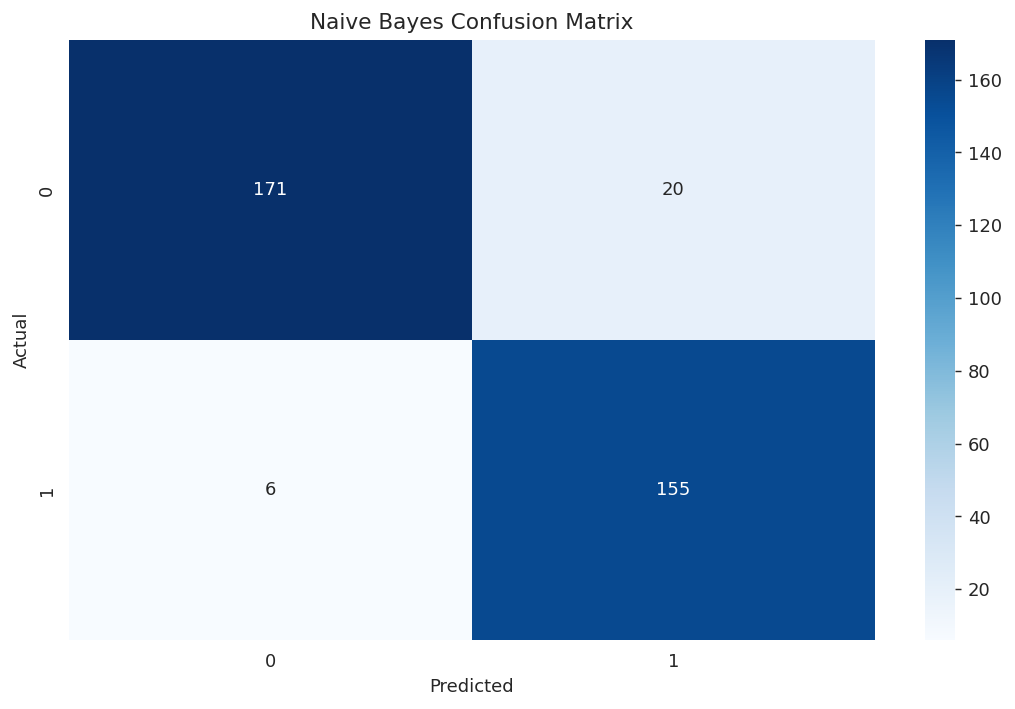

In [259]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6), dpi=130)
sns.heatmap(confusion_matrix(y_test,predictions_nb), annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Conclusion

In this project, we successfully classified YouTube comments as spam or not spam using four different machine learning algorithms: Decision Tree, Naive Bayes, Support Vector Machine (SVM), and Logistic Regression. All models demonstrated strong performance, achieving over 90% accuracy.

- **Decision Tree** achieved an accuracy of **92.9%**.
- **Naive Bayes** performed slightly lower with an accuracy of **92.6%**, but it was particularly effective in identifying spam comments.
- **Support Vector Machine (SVM)** showed a better performance with an accuracy of **93.5%**.
- **Logistic Regression** outperformed all others, attaining the highest accuracy at **94.6%**.

Following this evaluation, we tested the models on a set of random phrases. The results revealed that Naive Bayes worked well for spam detection, effectively identifying numerous spam phrases, even while being more aggressive in its predictions. SVM and Decision Tree models were more conservative in their classifications.

In summary, while all models performed admirably, **Naive Bayes stands out as a reliable choice for spam detection tasks due to its consistent performance**.
